## **Importing The Libraries**

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    mean_squared_error, r2_score, mean_absolute_error
)

import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

## **2. Loading and Exploring the Dataset**

- Link: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset


In [66]:
df=pd.read_csv("/content/winequality.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [67]:
print("Dataset loaded successfully!")
print(f"\nDataset Shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Dataset loaded successfully!

Dataset Shape: (1143, 13)
Number of rows: 1143
Number of columns: 13


In [68]:
display(df.info())
print("="*100)
display(df.describe().T)
print("="*100)
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


None

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [69]:
# Check for missing values
print("Missing Values in Each Column:")
print("="*50)
missing_values = df.isnull().sum()
print(missing_values)
print("\nTotal Missing Values:", missing_values.sum())

Missing Values in Each Column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Total Missing Values: 0


## **3. Exploratory Data Analysis (EDA)**

Distribution of Wine Quality:
quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: count, dtype: int64


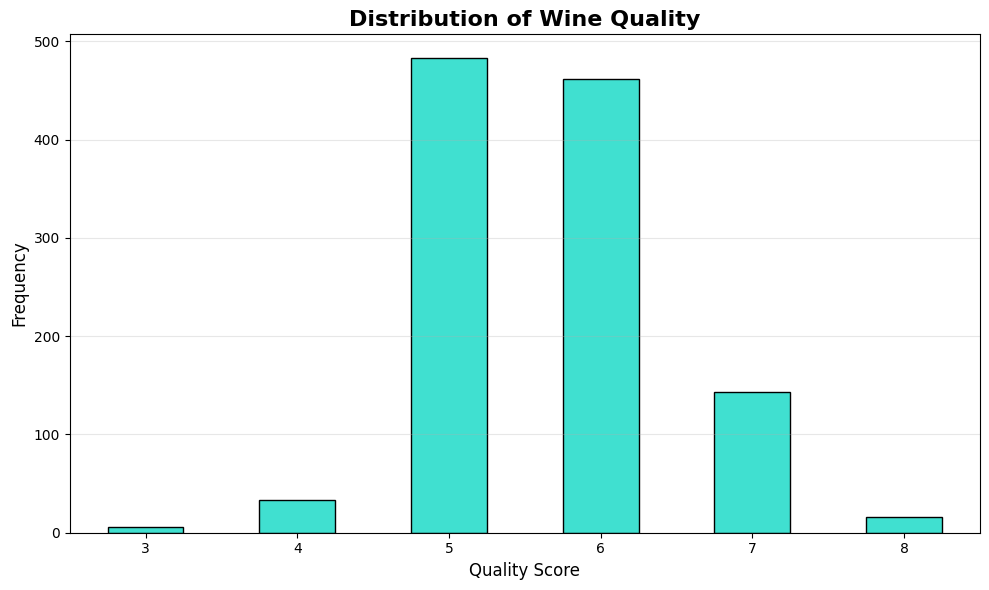

In [70]:
# Distribution of wine quality
print("Distribution of Wine Quality:")
print("="*50)
print(df['quality'].value_counts().sort_index())
print("="*50)
# Visualize quality distribution
plt.figure(figsize=(10, 6))
df['quality'].value_counts().sort_index().plot(kind='bar', color='turquoise', edgecolor='black')
plt.title('Distribution of Wine Quality', fontsize=16, fontweight='bold')
plt.xlabel('Quality Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

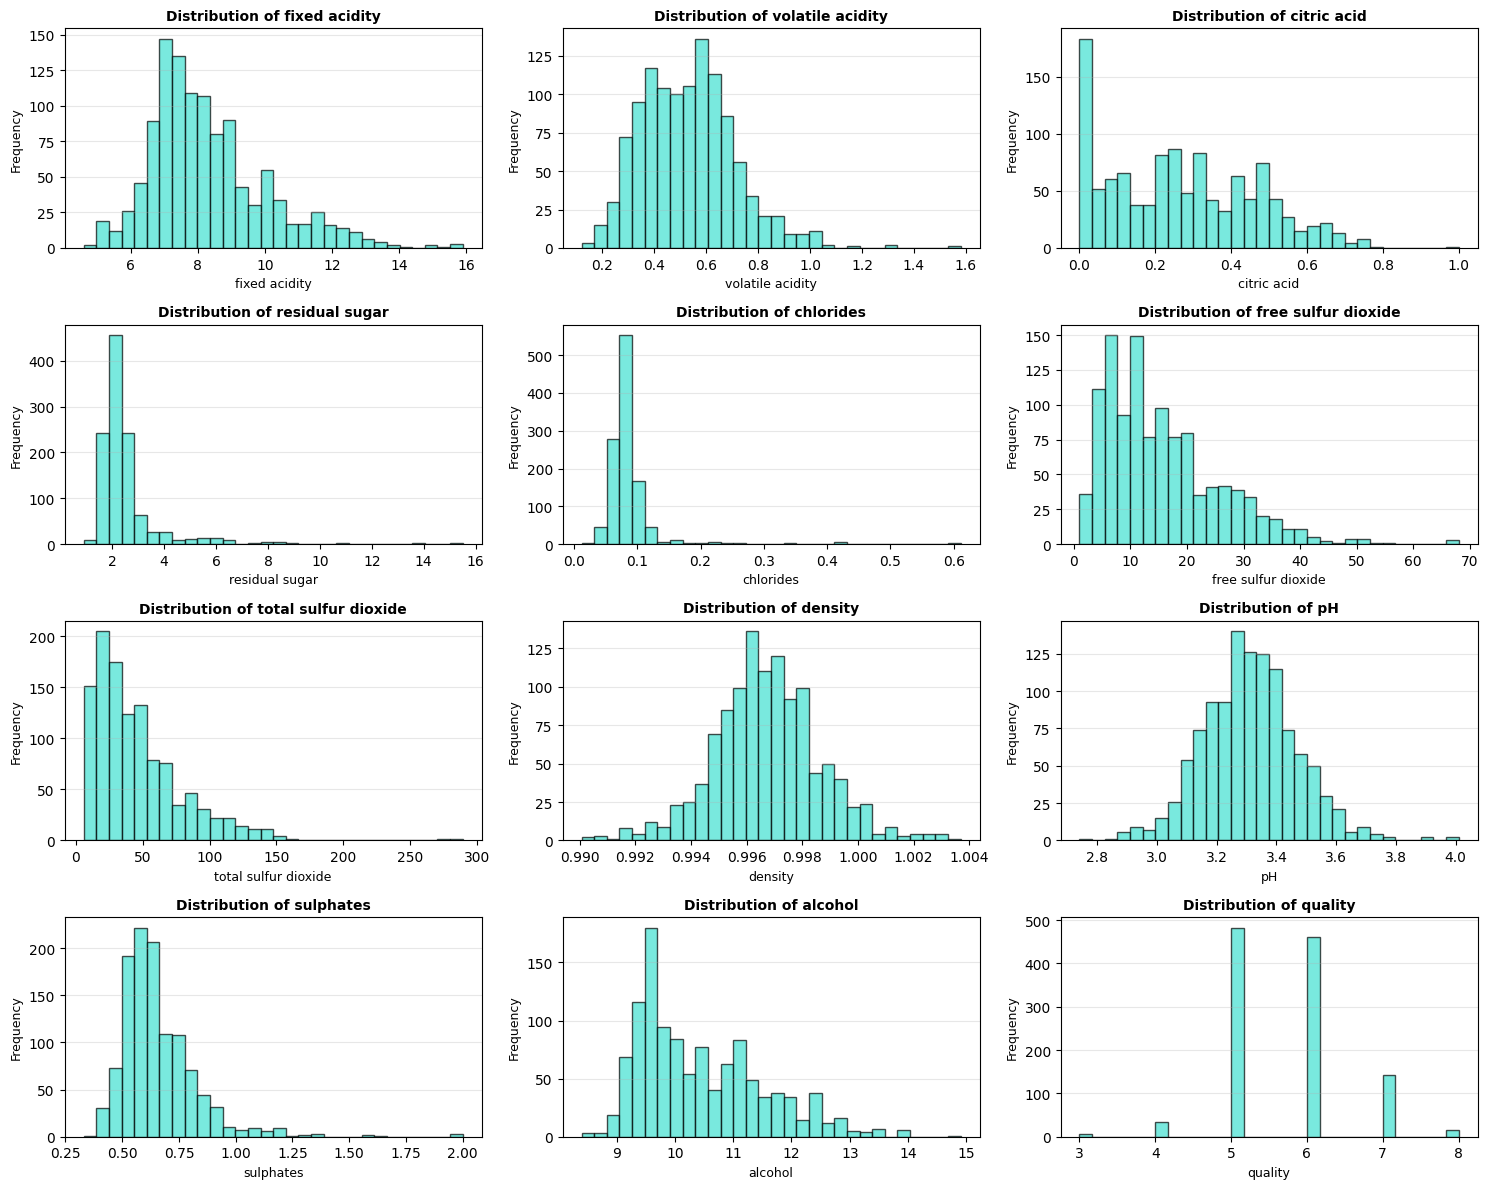

In [71]:
# Distribution of features
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    if i < len(axes):
        axes[i].hist(df[col], bins=30, color='turquoise', edgecolor='black', alpha=0.7)
        axes[i].set_title(f'Distribution of {col}', fontsize=10, fontweight='bold')
        axes[i].set_xlabel(col, fontsize=9)
        axes[i].set_ylabel('Frequency', fontsize=9)
        axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## **4. Data Preprocessing**

We will prepare the data for modeling by:
1. Creating binary classification (Good vs Bad wine) for Logistic Regression
2. Splitting features and target variable
3. Splitting into train and test sets
4. Feature scaling

In [72]:
# Binary classification: Quality >= 6 is 'Good' (1), else 'Bad' (0)
df['quality_binary'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)

print("Binary Classification Distribution:")
print("="*50)
print("0: Bad Wine (Quality < 6)")
print("1: Good Wine (Quality >= 6)")
print("\n", df['quality_binary'].value_counts())

Binary Classification Distribution:
0: Bad Wine (Quality < 6)
1: Good Wine (Quality >= 6)

 quality_binary
1    621
0    522
Name: count, dtype: int64


In [73]:
X_class = df.drop(['quality', 'quality_binary'], axis=1)
y_class = df['quality_binary']

print("Data Split for Models:")
print("="*50)
print(f"\nClassification - Features shape: {X_class.shape}")
print(f"Classification - Target shape: {y_class.shape}")

Data Split for Models:

Classification - Features shape: (1143, 12)
Classification - Target shape: (1143,)


In [84]:
# Split data into training and testing sets (80-20 split)

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class)

print("Train-Test Split Completed!")
print("="*50)
print(f"Classification:")
print(f"Training set size: {X_train_class.shape[0]} samples")
print(f"Testing set size: {X_test_class.shape[0]} samples")

Train-Test Split Completed!
Classification:
Training set size: 914 samples
Testing set size: 229 samples


In [85]:
# Feature Scaling using StandardScaler
scaler_class = StandardScaler()

# Scale classification data
X_train_class_scaled = scaler_class.fit_transform(X_train_class)
X_test_class_scaled = scaler_class.transform(X_test_class)

print("Feature Scaling Completed!")
print("="*50)
print("All features have been standardized (mean=0, std=1)")

Feature Scaling Completed!
All features have been standardized (mean=0, std=1)


### **Logistic Regression Model**

Training Logistic Regression Model...

Logistic Regression Results:
Training Accuracy: 0.7626 (76.26%)
Testing Accuracy: 0.7773 (77.73%)

Classification Report (Test Set):
              precision    recall  f1-score   support

    Bad Wine       0.75      0.77      0.76       105
   Good Wine       0.80      0.78      0.79       124

    accuracy                           0.78       229
   macro avg       0.78      0.78      0.78       229
weighted avg       0.78      0.78      0.78       229



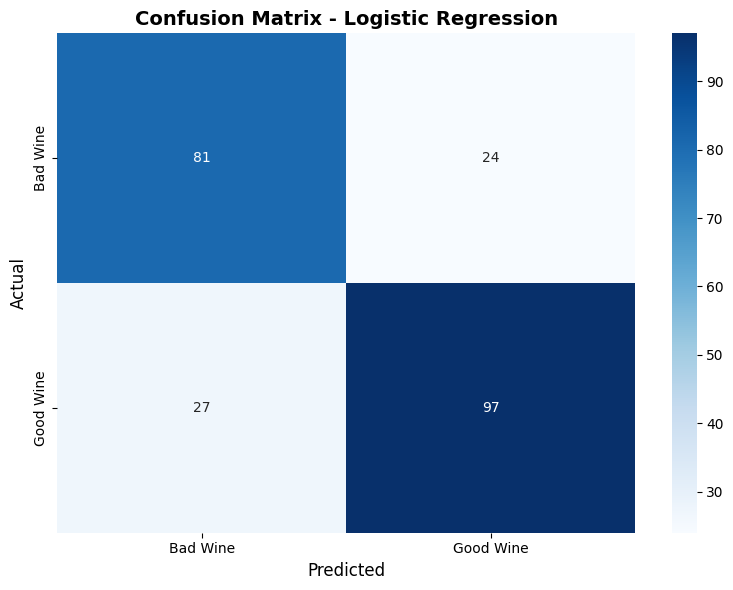


Logistic Regression Model trained successfully!


In [86]:
# Train Logistic Regression Model
print("Training Logistic Regression Model...")
print("="*50)

log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train_class_scaled, y_train_class)

# Make predictions
y_pred_log_train = log_reg_model.predict(X_train_class_scaled)
y_pred_log_test = log_reg_model.predict(X_test_class_scaled)

# Evaluate the model
log_train_acc = accuracy_score(y_train_class, y_pred_log_train)
log_test_acc = accuracy_score(y_test_class, y_pred_log_test)

print("\nLogistic Regression Results:")
print("="*50)
print(f"Training Accuracy: {log_train_acc:.4f} ({log_train_acc*100:.2f}%)")
print(f"Testing Accuracy: {log_test_acc:.4f} ({log_test_acc*100:.2f}%)")

print("\nClassification Report (Test Set):")
print(classification_report(y_test_class, y_pred_log_test,
                          target_names=['Bad Wine', 'Good Wine']))

# Confusion Matrix
cm_log = confusion_matrix(y_test_class, y_pred_log_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bad Wine', 'Good Wine'],
            yticklabels=['Bad Wine', 'Good Wine'])
plt.title('Confusion Matrix - Logistic Regression', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

print("\nLogistic Regression Model trained successfully!")

### **Decision Tree Classifier Model**

Training Decision Tree Classifier...

Decision Tree Classifier Results:
Training Accuracy: 0.9683 (96.83%)
Testing Accuracy: 0.7336 (73.36%)

Classification Report (Test Set):
              precision    recall  f1-score   support

    Bad Wine       0.72      0.70      0.71       105
   Good Wine       0.75      0.77      0.76       124

    accuracy                           0.73       229
   macro avg       0.73      0.73      0.73       229
weighted avg       0.73      0.73      0.73       229



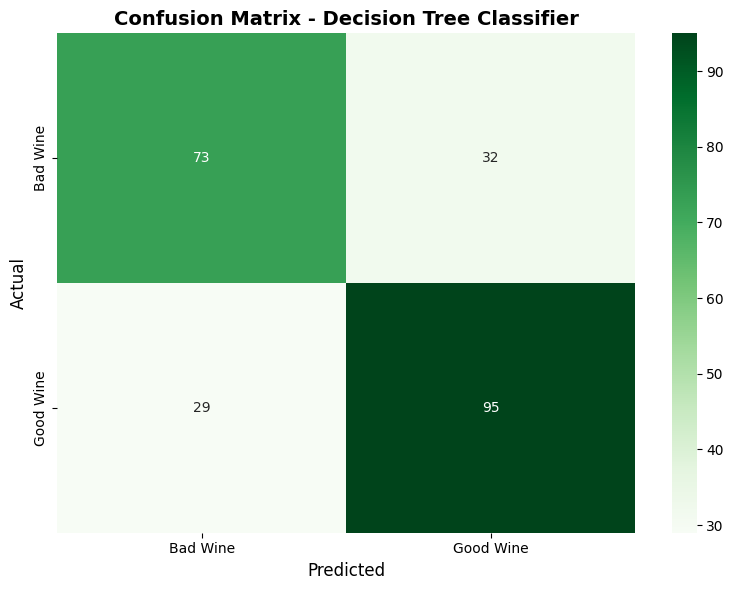


Decision Tree Classifier trained successfully!


In [97]:
# Train Decision Tree Classifier
print("Training Decision Tree Classifier...")
print("="*50)

dt_class_model = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_class_model.fit(X_train_class_scaled, y_train_class)

# Make predictions
y_pred_dt_class_train = dt_class_model.predict(X_train_class_scaled)
y_pred_dt_class_test = dt_class_model.predict(X_test_class_scaled)

# Evaluate the model
dt_class_train_acc = accuracy_score(y_train_class, y_pred_dt_class_train)
dt_class_test_acc = accuracy_score(y_test_class, y_pred_dt_class_test)

print("\nDecision Tree Classifier Results:")
print("="*50)
print(f"Training Accuracy: {dt_class_train_acc:.4f} ({dt_class_train_acc*100:.2f}%)")
print(f"Testing Accuracy: {dt_class_test_acc:.4f} ({dt_class_test_acc*100:.2f}%)")

print("\nClassification Report (Test Set):")
print(classification_report(y_test_class, y_pred_dt_class_test,
                          target_names=['Bad Wine', 'Good Wine']))

# Confusion Matrix
cm_dt = confusion_matrix(y_test_class, y_pred_dt_class_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Bad Wine', 'Good Wine'],
            yticklabels=['Bad Wine', 'Good Wine'])
plt.title('Confusion Matrix - Decision Tree Classifier', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

print("\nDecision Tree Classifier trained successfully!")

In [101]:
# Compare accuracy of Decision Tree and Logistic Regression models
dt_accuracy = accuracy_score(y_test_class, dt_class_model.predict(X_test_class_scaled))
lr_accuracy = accuracy_score(y_test_class, log_reg_model.predict(X_test_class_scaled))

print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

# Determine the best model based on accuracy
if dt_accuracy > lr_accuracy:
    print("\nDecision Tree Model performed better based on accuracy.")
elif lr_accuracy > dt_accuracy:
    print("\nLogistic Regression Model performed better based on accuracy.")
else:
    print("\nModels have similar accuracy.")

Logistic Regression Accuracy: 0.7773
Decision Tree Accuracy: 0.7336

Logistic Regression Model performed better based on accuracy.



               CLASSIFICATION MODELS COMPARISON

                    Model  Train Accuracy (%)  Test Accuracy (%)
     Logistic Regression           76.258206          77.729258
Decision Tree Classifier           96.827133          73.362445



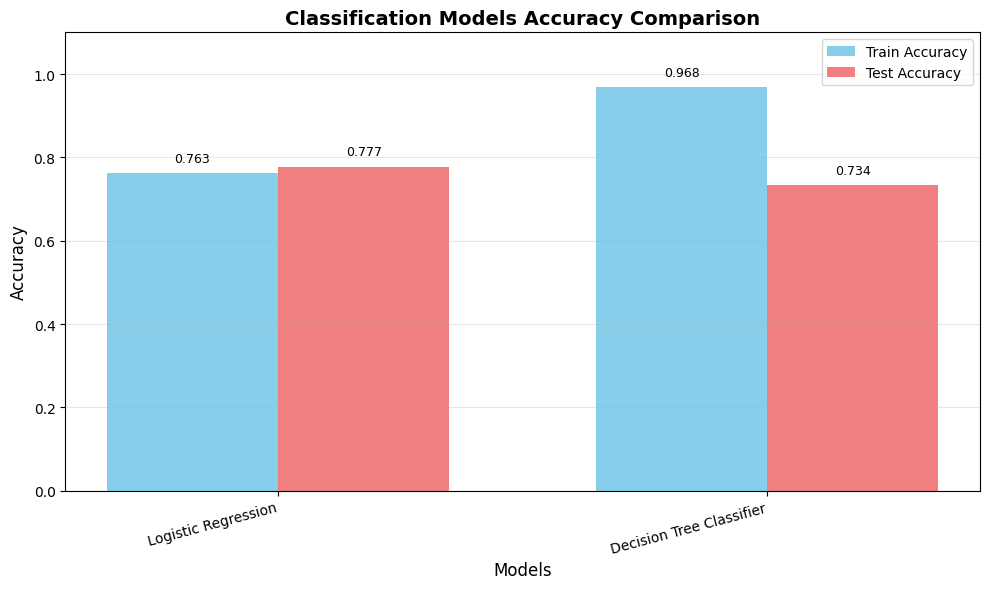

In [103]:
# Compare all classification models
print("\n" + "="*70)
print(" "*15 + "CLASSIFICATION MODELS COMPARISON")
print("="*70)

classification_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree Classifier'],
    'Train Accuracy': [log_train_acc, dt_class_train_acc],
    'Test Accuracy': [log_test_acc, dt_class_test_acc,],
    'Train Accuracy (%)': [log_train_acc*100, dt_class_train_acc*100],
    'Test Accuracy (%)': [log_test_acc*100, dt_class_test_acc*100]
})

print("\n", classification_results[['Model', 'Train Accuracy (%)', 'Test Accuracy (%)']].to_string(index=False))
print("\n" + "="*70)

# Visualize Accuracy
fig, ax = plt.subplots(figsize=(10, 6))

models = classification_results['Model']
x = np.arange(len(models))
width = 0.35

ax.bar(x - width/2, classification_results['Train Accuracy'], width,
       label='Train Accuracy', color='skyblue')
ax.bar(x + width/2, classification_results['Test Accuracy'], width,
       label='Test Accuracy', color='lightcoral')
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Classification Models Accuracy Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1.1])

# Add value labels on bars
for i, (train, test) in enumerate(zip(classification_results['Train Accuracy'],
                                       classification_results['Test Accuracy'])):
    ax.text(i - width/2, train + 0.02, f'{train:.3f}', ha='center', va='bottom', fontsize=9)
    ax.text(i + width/2, test + 0.02, f'{test:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()